Получите значения AUC для различных моделей и их параметров для датасета adult.csv

In [459]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
%config InlineBackend.figure_format = 'svg'

In [460]:
df = pd.read_csv('adult.csv')

In [461]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [463]:
categories = ['workclass','education','marital-status','occupation','relationship','race','gender','native-country', 'income']

for i in categories:
    print(f"{i} \n {10*'-'} \n {df[i].value_counts()} \n\n")

workclass 
 ---------- 
 Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64 


education 
 ---------- 
 HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64 


marital-status 
 ---------- 
 Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64 


occupation 
 

In [464]:
le = LabelEncoder()

def label_encoder(feature):
    df[feature] = le.fit_transform(df[feature])

for i in categories:
    label_encoder(i)

In [465]:
y = df['gender']
X = df.drop(['gender'], axis=1)

In [466]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [467]:
# Выберем несколько моделей
model_list = [LogisticRegression(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier()]

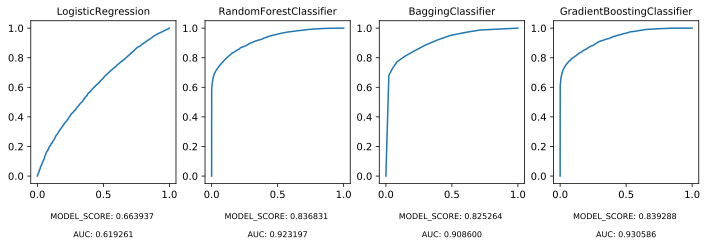

In [468]:
def summary(model_name):
    fig, ax = plt.subplots(1, 4, figsize=(12,3))
    
    for model_name in model_list:
        i = model_list.index(model_name)
        model = model_name
        model.fit(X_train, y_train)
        predict = model.predict_proba(X_test)
        fpr, tpr, thres = roc_curve(y_test, predict[:, 1])
        ax[i].plot(fpr, tpr)
        ax[i].set_title(str(model_name).split('(')[0], fontsize=10)
        ax[i].set_xlabel(f"\nMODEL_SCORE: {model.score(X_test, y_test):2f} \n\nAUC: {auc(fpr, tpr):2f}", fontsize=8)

summary(model_list)    